# Toy neural network example

We train a neural network giving of u in <0,1> a point (x,y) with coordinates 
$x = cos(2\pi u)$
$y = sin(2\pi u)$
that is, a point on a unit circle. The network will work as a random "transformer", transforming a random u in <0,1> to a random point on a unit circle. 

# Tasks:
### 1. Study the code.
There are several things that can be new:
- numpy arrays: notice how we can operate on arrays - square them, take a sine or cosine, reshape them
- pandas dataframes: notice how we can pack several arrays into a data table - a pandas DataFrame.
- matplotlib plots: notice how simply we plot things.

### 2. Study the neural network.
- Training data. To train a neural network, we have to have a proper sample of training data. In this case, it is very simple to generate them. See what happens when you use a smaller or larger training sample.
- Hyperparameters. We have some freedom in selecting how the network looks (sizes of hidden layers) and how we train it. Look into scikit-learn documentation (google "scikit learn MLPRegressor") and experiment with various combinations of hyperparameters. Optimize training data size and hyperparameters to achieve best precision.
Rules for hidden layers: 
(i) In theory, a neural network with a single layer can represent any mapping between inputs and outputs (if sufficiently large). 
(ii) If the problem is strongly non-linear, then a two-layer network can be easier to train. 
(iii) More than two hidden layers are usually unnecessary.

### 3. Investigate the problem.
We need a surprisingly large network and a lot of training data to make the example work.
On the other hand, the training is fairly fast. 

A. Create a network that will produce density proportional to $u(1-u)$ on the unit circle (rather than uniform)

B. Create a network that will produce uniform density on an ellipse.

C. Our network has a single input, u. Try to add some orthogonal polynomials (Legendre or Chebyshev) as additional inputs and examine how such networks train.

## 0. Includes

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import uniform
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## 1. Generate data

In [2]:
def make_circle_data(n_samples = 100):
    """Creates pandas dataframe with columns u, x, y, such that u ~ U[0,1], x = cos(2*pi*u), y = sin(2*pi*u)."""
    u = uniform.rvs(0,1,n_samples) 
    x = np.cos(2*np.pi*u)
    y = np.sin(2*np.pi*u)
    return pd.DataFrame({'u':u, 'x':x, 'y':y})


## 2. Train a network regressor

In [3]:
def train_network(data, test_fraction = 0.1):
    """Returns a trained network object"""
    input_cols = ['u']
    output_cols = ['x','y']
    n_rows = len(data)
    n_test = int(n_rows * test_fraction)
    n_train = n_rows - n_test
    X_train = data[input_cols].values[:n_train]
    X_test = data[input_cols].values[n_train:]
    Y_train = data[output_cols].values[:n_train]
    Y_test = data[output_cols].values[n_train:]
    fitter = MLPRegressor(
                hidden_layer_sizes = (60,60),
                activation = 'relu',
                tol = 1.0e-7,
                alpha = 1.0e-5,
                verbose = True
            )
    fitter.fit(X_train, Y_train)
    print('Fit done. Score: {0}'.format(fitter.score(X_test, Y_test)))
    Y_pred = fitter.predict(X_test)
    rmse = np.sqrt(np.sum((Y_pred - Y_test)**2, axis = 0)/n_test)
    print('RMS error: x {0}, y {1}'.format(rmse[0], rmse[1]))
    return fitter

In [4]:

def tune_network(data, test_fraction = 0.1):
    """Returns a trained network object"""
    input_cols = ['u']
    output_cols = ['x','y']
    n_rows = len(data)
    n_test = int(n_rows * test_fraction)
    n_train = n_rows - n_test
    X_train = data[input_cols].values[:n_train]
    X_test = data[input_cols].values[n_train:]
    Y_train = data[output_cols].values[:n_train]
    Y_test = data[output_cols].values[n_train:]
    fitter0 = MLPRegressor(
                hidden_layer_sizes = (60,60),
                activation = 'relu',
                tol = 1.0e-7,
                alpha = 1.0e-5,
                verbose = True
            )
    # Optimize for alpha, layer size
    fitter = GridSearchCV(
        fitter0, 
        param_grid = {
            'alpha':[1.0e-5, 1.0e-4,1.0e-3,1.0e-2,1.0e-1],
            'hidden_layer_sizes':[(a, a) for a in [40,60,80]]
        }, 
        verbose = 1
    )
    fitter.fit(X_train, Y_train)
    print('Fit done. Score: {0}'.format(fitter.score(X_test, Y_test)))
    Y_pred = fitter.predict(X_test)
    rmse = np.sqrt(np.sum((Y_pred - Y_test)**2, axis = 0)/n_test)
    print('RMS error: x {0}, y {1}'.format(rmse[0], rmse[1]))
    return fitter

## 3. Run and plot results

In [5]:
# Generate samples
samples = make_circle_data(20000)
samples.head()
# Train the network
fitter = tune_network(samples)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Iteration 1, loss = 0.19854670
Iteration 2, loss = 0.11733309
Iteration 3, loss = 0.07537168
Iteration 4, loss = 0.04775515
Iteration 5, loss = 0.03616853
Iteration 6, loss = 0.03113488
Iteration 7, loss = 0.02746806
Iteration 8, loss = 0.02394053
Iteration 9, loss = 0.02007266
Iteration 10, loss = 0.01566999
Iteration 11, loss = 0.01141947
Iteration 12, loss = 0.00784207
Iteration 13, loss = 0.00526845
Iteration 14, loss = 0.00353257
Iteration 15, loss = 0.00243600
Iteration 16, loss = 0.00172514
Iteration 17, loss = 0.00126981
Iteration 18, loss = 0.00093448
Iteration 19, loss = 0.00071379
Iteration 20, loss = 0.00054212
Iteration 21, loss = 0.00042889
Iteration 22, loss = 0.00035218
Iteration 23, loss = 0.00028630
Iteration 24, loss = 0.00024104
Iteration 25, loss = 0.00020905
Iteration 26, loss = 0.00017635
Iteration 27, loss = 0.00015499
Iteration 28, loss = 0.00013564
Iteration 29, loss = 0.00011921
Iteration 30, loss =

Iteration 18, loss = 0.00013118
Iteration 19, loss = 0.00009789
Iteration 20, loss = 0.00007706
Iteration 21, loss = 0.00006360
Iteration 22, loss = 0.00005366
Iteration 23, loss = 0.00004617
Iteration 24, loss = 0.00003881
Iteration 25, loss = 0.00003436
Iteration 26, loss = 0.00003176
Iteration 27, loss = 0.00002899
Iteration 28, loss = 0.00002651
Iteration 29, loss = 0.00002484
Iteration 30, loss = 0.00002329
Iteration 31, loss = 0.00002233
Iteration 32, loss = 0.00002135
Iteration 33, loss = 0.00002160
Iteration 34, loss = 0.00002033
Iteration 35, loss = 0.00002039
Iteration 36, loss = 0.00001934
Iteration 37, loss = 0.00001852
Iteration 38, loss = 0.00001942
Iteration 39, loss = 0.00001883
Iteration 40, loss = 0.00001752
Iteration 41, loss = 0.00001733
Iteration 42, loss = 0.00001771
Iteration 43, loss = 0.00001720
Iteration 44, loss = 0.00001834
Iteration 45, loss = 0.00001699
Iteration 46, loss = 0.00001751
Iteration 47, loss = 0.00001632
Iteration 48, loss = 0.00001852
Iteratio

Iteration 34, loss = 0.00004332
Iteration 35, loss = 0.00004044
Iteration 36, loss = 0.00003778
Iteration 37, loss = 0.00004044
Iteration 38, loss = 0.00003543
Iteration 39, loss = 0.00003640
Iteration 40, loss = 0.00003079
Iteration 41, loss = 0.00002819
Iteration 42, loss = 0.00002725
Iteration 43, loss = 0.00002714
Iteration 44, loss = 0.00002467
Iteration 45, loss = 0.00002439
Iteration 46, loss = 0.00002597
Iteration 47, loss = 0.00002371
Iteration 48, loss = 0.00002471
Iteration 49, loss = 0.00002045
Iteration 50, loss = 0.00001977
Iteration 51, loss = 0.00001860
Iteration 52, loss = 0.00001958
Iteration 53, loss = 0.00001836
Iteration 54, loss = 0.00001893
Iteration 55, loss = 0.00001991
Iteration 56, loss = 0.00002441
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.19948469
Iteration 2, loss = 0.10832664
Iteration 3, loss = 0.04845474
Iteration 4, loss = 0.02423172
Iteration 5, loss = 0.01545194
Iteration 6, loss 

Iteration 32, loss = 0.00031772
Iteration 33, loss = 0.00030192
Iteration 34, loss = 0.00028583
Iteration 35, loss = 0.00026697
Iteration 36, loss = 0.00025471
Iteration 37, loss = 0.00024095
Iteration 38, loss = 0.00021698
Iteration 39, loss = 0.00019209
Iteration 40, loss = 0.00017365
Iteration 41, loss = 0.00015937
Iteration 42, loss = 0.00014920
Iteration 43, loss = 0.00013931
Iteration 44, loss = 0.00013269
Iteration 45, loss = 0.00012645
Iteration 46, loss = 0.00012025
Iteration 47, loss = 0.00011844
Iteration 48, loss = 0.00011288
Iteration 49, loss = 0.00011063
Iteration 50, loss = 0.00010717
Iteration 51, loss = 0.00010424
Iteration 52, loss = 0.00010206
Iteration 53, loss = 0.00010208
Iteration 54, loss = 0.00009615
Iteration 55, loss = 0.00009543
Iteration 56, loss = 0.00009383
Iteration 57, loss = 0.00009187
Iteration 58, loss = 0.00009118
Iteration 59, loss = 0.00009092
Iteration 60, loss = 0.00008732
Iteration 61, loss = 0.00008617
Iteration 62, loss = 0.00008617
Iteratio

Iteration 46, loss = 0.00003862
Iteration 47, loss = 0.00003989
Iteration 48, loss = 0.00003977
Iteration 49, loss = 0.00003714
Iteration 50, loss = 0.00003730
Iteration 51, loss = 0.00003658
Iteration 52, loss = 0.00003809
Iteration 53, loss = 0.00003638
Iteration 54, loss = 0.00003545
Iteration 55, loss = 0.00003503
Iteration 56, loss = 0.00003619
Iteration 57, loss = 0.00003581
Iteration 58, loss = 0.00003478
Iteration 59, loss = 0.00003407
Iteration 60, loss = 0.00003386
Iteration 61, loss = 0.00003602
Iteration 62, loss = 0.00003594
Iteration 63, loss = 0.00003419
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.20384274
Iteration 2, loss = 0.12596332
Iteration 3, loss = 0.06295752
Iteration 4, loss = 0.02856895
Iteration 5, loss = 0.01778040
Iteration 6, loss = 0.01120426
Iteration 7, loss = 0.00667421
Iteration 8, loss = 0.00404668
Iteration 9, loss = 0.00257133
Iteration 10, loss = 0.00177079
Iteration 11, loss = 0

Iteration 42, loss = 0.00032161
Iteration 43, loss = 0.00031648
Iteration 44, loss = 0.00030490
Iteration 45, loss = 0.00030023
Iteration 46, loss = 0.00029269
Iteration 47, loss = 0.00028792
Iteration 48, loss = 0.00028205
Iteration 49, loss = 0.00027777
Iteration 50, loss = 0.00027309
Iteration 51, loss = 0.00027020
Iteration 52, loss = 0.00026372
Iteration 53, loss = 0.00026316
Iteration 54, loss = 0.00025900
Iteration 55, loss = 0.00025600
Iteration 56, loss = 0.00025101
Iteration 57, loss = 0.00025189
Iteration 58, loss = 0.00025021
Iteration 59, loss = 0.00024517
Iteration 60, loss = 0.00024245
Iteration 61, loss = 0.00024189
Iteration 62, loss = 0.00023874
Iteration 63, loss = 0.00023880
Iteration 64, loss = 0.00023688
Iteration 65, loss = 0.00023630
Iteration 66, loss = 0.00023245
Iteration 67, loss = 0.00023367
Iteration 68, loss = 0.00022976
Iteration 69, loss = 0.00022798
Iteration 70, loss = 0.00022817
Iteration 71, loss = 0.00022643
Iteration 72, loss = 0.00022452
Iteratio

Iteration 7, loss = 0.00588177
Iteration 8, loss = 0.00360094
Iteration 9, loss = 0.00237476
Iteration 10, loss = 0.00164685
Iteration 11, loss = 0.00121628
Iteration 12, loss = 0.00094413
Iteration 13, loss = 0.00076209
Iteration 14, loss = 0.00063499
Iteration 15, loss = 0.00054662
Iteration 16, loss = 0.00047790
Iteration 17, loss = 0.00042724
Iteration 18, loss = 0.00038896
Iteration 19, loss = 0.00035781
Iteration 20, loss = 0.00033333
Iteration 21, loss = 0.00031423
Iteration 22, loss = 0.00030114
Iteration 23, loss = 0.00028736
Iteration 24, loss = 0.00027587
Iteration 25, loss = 0.00026371
Iteration 26, loss = 0.00025425
Iteration 27, loss = 0.00024815
Iteration 28, loss = 0.00024326
Iteration 29, loss = 0.00023871
Iteration 30, loss = 0.00023539
Iteration 31, loss = 0.00023373
Iteration 32, loss = 0.00023028
Iteration 33, loss = 0.00022760
Iteration 34, loss = 0.00022514
Iteration 35, loss = 0.00022357
Iteration 36, loss = 0.00022222
Iteration 37, loss = 0.00022094
Iteration 3

Iteration 71, loss = 0.00020455
Iteration 72, loss = 0.00020315
Iteration 73, loss = 0.00020356
Iteration 74, loss = 0.00020304
Iteration 75, loss = 0.00020094
Iteration 76, loss = 0.00020093
Iteration 77, loss = 0.00020194
Iteration 78, loss = 0.00020264
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.17319812
Iteration 2, loss = 0.09625878
Iteration 3, loss = 0.04292644
Iteration 4, loss = 0.02226533
Iteration 5, loss = 0.01418693
Iteration 6, loss = 0.00868974
Iteration 7, loss = 0.00537667
Iteration 8, loss = 0.00351904
Iteration 9, loss = 0.00247117
Iteration 10, loss = 0.00184608
Iteration 11, loss = 0.00146323
Iteration 12, loss = 0.00119435
Iteration 13, loss = 0.00100092
Iteration 14, loss = 0.00085428
Iteration 15, loss = 0.00076153
Iteration 16, loss = 0.00067592
Iteration 17, loss = 0.00061734
Iteration 18, loss = 0.00056646
Iteration 19, loss = 0.00053048
Iteration 20, loss = 0.00049647
Iteration 21, loss = 0

Iteration 20, loss = 0.00191598
Iteration 21, loss = 0.00183890
Iteration 22, loss = 0.00176535
Iteration 23, loss = 0.00171556
Iteration 24, loss = 0.00168632
Iteration 25, loss = 0.00167250
Iteration 26, loss = 0.00165130
Iteration 27, loss = 0.00164398
Iteration 28, loss = 0.00163175
Iteration 29, loss = 0.00162314
Iteration 30, loss = 0.00161782
Iteration 31, loss = 0.00161143
Iteration 32, loss = 0.00160891
Iteration 33, loss = 0.00160284
Iteration 34, loss = 0.00159693
Iteration 35, loss = 0.00159330
Iteration 36, loss = 0.00159019
Iteration 37, loss = 0.00158597
Iteration 38, loss = 0.00158096
Iteration 39, loss = 0.00157645
Iteration 40, loss = 0.00157230
Iteration 41, loss = 0.00156831
Iteration 42, loss = 0.00156522
Iteration 43, loss = 0.00155970
Iteration 44, loss = 0.00155455
Iteration 45, loss = 0.00155130
Iteration 46, loss = 0.00154613
Iteration 47, loss = 0.00153877
Iteration 48, loss = 0.00153560
Iteration 49, loss = 0.00153086
Iteration 50, loss = 0.00152522
Iteratio

/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.21333687
Iteration 2, loss = 0.15181383
Iteration 3, loss = 0.11258270
Iteration 4, loss = 0.07474683
Iteration 5, loss = 0.04387544
Iteration 6, loss = 0.02877417
Iteration 7, loss = 0.01972089
Iteration 8, loss = 0.01333140
Iteration 9, loss = 0.00917433
Iteration 10, loss = 0.00657075
Iteration 11, loss = 0.00500844
Iteration 12, loss = 0.00410751
Iteration 13, loss = 0.00350047
Iteration 14, loss = 0.00308508
Iteration 15, loss = 0.00280019
Iteration 16, loss = 0.00259162
Iteration 17, loss = 0.00243521
Iteration 18, loss = 0.00232077
Iteration 19, loss = 0.00223043
Iteration 20, loss = 0.00216242
Iteration 21, loss = 0.00210924
Iteration 22, loss = 0.00205954
Iteration 23, loss = 0.00202308
Iteration 24, loss = 0.00199277
Iteration 25, loss = 0.00196251
Iteration 26, loss = 0.00193908
Iteration 27, loss = 0.00191798
Iteration 28, loss = 0.00190027
Iteration 29, loss = 0.00187788
Iteration 30, loss = 0.00186040
Iteration 31, loss = 0.00184557
Iteration 32, los

/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.20803149
Iteration 2, loss = 0.13296621
Iteration 3, loss = 0.08113563
Iteration 4, loss = 0.04794883
Iteration 5, loss = 0.03216581
Iteration 6, loss = 0.02383249
Iteration 7, loss = 0.01811790
Iteration 8, loss = 0.01319316
Iteration 9, loss = 0.00928494
Iteration 10, loss = 0.00671397
Iteration 11, loss = 0.00509001
Iteration 12, loss = 0.00409786
Iteration 13, loss = 0.00343920
Iteration 14, loss = 0.00298803
Iteration 15, loss = 0.00268095
Iteration 16, loss = 0.00245098
Iteration 17, loss = 0.00227915
Iteration 18, loss = 0.00214759
Iteration 19, loss = 0.00204529
Iteration 20, loss = 0.00197047
Iteration 21, loss = 0.00190846
Iteration 22, loss = 0.00185677
Iteration 23, loss = 0.00182128
Iteration 24, loss = 0.00178026
Iteration 25, loss = 0.00175146
Iteration 26, loss = 0.00172538
Iteration 27, loss = 0.00170105
Iteration 28, loss = 0.00168099
Iteration 29, loss = 0.00166255
Iteration 30, loss = 0.00165064
Iteration 31, loss = 0.00162993
Iteration 32, los

/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.19442538
Iteration 2, loss = 0.12056656
Iteration 3, loss = 0.07156676
Iteration 4, loss = 0.03540988
Iteration 5, loss = 0.01966448
Iteration 6, loss = 0.01208485
Iteration 7, loss = 0.00796288
Iteration 8, loss = 0.00572245
Iteration 9, loss = 0.00447558
Iteration 10, loss = 0.00363990
Iteration 11, loss = 0.00302396
Iteration 12, loss = 0.00264209
Iteration 13, loss = 0.00245214
Iteration 14, loss = 0.00233584
Iteration 15, loss = 0.00227048
Iteration 16, loss = 0.00222611
Iteration 17, loss = 0.00219104
Iteration 18, loss = 0.00216333
Iteration 19, loss = 0.00213675
Iteration 20, loss = 0.00211596
Iteration 21, loss = 0.00209251
Iteration 22, loss = 0.00207261
Iteration 23, loss = 0.00205361
Iteration 24, loss = 0.00203491
Iteration 25, loss = 0.00201518
Iteration 26, loss = 0.00199731
Iteration 27, loss = 0.00197872
Iteration 28, loss = 0.00196067
Iteration 29, loss = 0.00194440
Iteration 30, loss = 0.00192653
Iteration 31, loss = 0.00190665
Iteration 32, los

Iteration 99, loss = 0.00109681
Iteration 100, loss = 0.00109226
Iteration 101, loss = 0.00108633
Iteration 102, loss = 0.00108118
Iteration 103, loss = 0.00107873
Iteration 104, loss = 0.00107565
Iteration 105, loss = 0.00107288
Iteration 106, loss = 0.00106774
Iteration 107, loss = 0.00106709
Iteration 108, loss = 0.00106127
Iteration 109, loss = 0.00105558
Iteration 110, loss = 0.00105120
Iteration 111, loss = 0.00104814
Iteration 112, loss = 0.00104426
Iteration 113, loss = 0.00104106
Iteration 114, loss = 0.00103804
Iteration 115, loss = 0.00103541
Iteration 116, loss = 0.00103254
Iteration 117, loss = 0.00102891
Iteration 118, loss = 0.00102679
Iteration 119, loss = 0.00102378
Iteration 120, loss = 0.00102193
Iteration 121, loss = 0.00101859
Iteration 122, loss = 0.00102039
Iteration 123, loss = 0.00101343
Iteration 124, loss = 0.00101336
Iteration 125, loss = 0.00101084
Iteration 126, loss = 0.00100823
Iteration 127, loss = 0.00100380
Iteration 128, loss = 0.00100186
Iteration 1

Iteration 165, loss = 0.00102152
Iteration 166, loss = 0.00101062
Iteration 167, loss = 0.00101173
Iteration 168, loss = 0.00100849
Iteration 169, loss = 0.00100536
Iteration 170, loss = 0.00101022
Iteration 171, loss = 0.00100454
Iteration 172, loss = 0.00100791
Iteration 173, loss = 0.00100213
Iteration 174, loss = 0.00100140
Iteration 175, loss = 0.00099880
Iteration 176, loss = 0.00099784
Iteration 177, loss = 0.00099387
Iteration 178, loss = 0.00099445
Iteration 179, loss = 0.00099548
Iteration 180, loss = 0.00099138
Iteration 181, loss = 0.00099007
Iteration 182, loss = 0.00099158
Iteration 183, loss = 0.00099401
Iteration 184, loss = 0.00098515
Iteration 185, loss = 0.00098866
Iteration 186, loss = 0.00098750
Iteration 187, loss = 0.00098485
Iteration 188, loss = 0.00098208
Iteration 189, loss = 0.00098126
Iteration 190, loss = 0.00097975
Iteration 191, loss = 0.00098399
Iteration 192, loss = 0.00097688
Iteration 193, loss = 0.00097439
Iteration 194, loss = 0.00097586
Iteration 

/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.10102404
Iteration 3, loss = 0.04782796
Iteration 4, loss = 0.02615603
Iteration 5, loss = 0.01818331
Iteration 6, loss = 0.01233986
Iteration 7, loss = 0.00841061
Iteration 8, loss = 0.00609190
Iteration 9, loss = 0.00481886
Iteration 10, loss = 0.00398881
Iteration 11, loss = 0.00349602
Iteration 12, loss = 0.00316098
Iteration 13, loss = 0.00293574
Iteration 14, loss = 0.00278534
Iteration 15, loss = 0.00267250
Iteration 16, loss = 0.00258812
Iteration 17, loss = 0.00252870
Iteration 18, loss = 0.00246985
Iteration 19, loss = 0.00241837
Iteration 20, loss = 0.00237574
Iteration 21, loss = 0.00233837
Iteration 22, loss = 0.00230170
Iteration 23, loss = 0.00227065
Iteration 24, loss = 0.00224208
Iteration 25, loss = 0.00221259
Iteration 26, loss = 0.00218391
Iteration 27, loss = 0.00215402
Iteration 28, loss = 0.00212547
Iteration 29, loss = 0.00209833
Iteration 30, loss = 0.00207377
Iteration 31, loss = 0.00205021
Iteration 32, loss = 0.00202643
Iteration 33, lo

Iteration 108, loss = 0.00106056
Iteration 109, loss = 0.00106040
Iteration 110, loss = 0.00105378
Iteration 111, loss = 0.00105545
Iteration 112, loss = 0.00105231
Iteration 113, loss = 0.00104230
Iteration 114, loss = 0.00104059
Iteration 115, loss = 0.00103952
Iteration 116, loss = 0.00103768
Iteration 117, loss = 0.00103628
Iteration 118, loss = 0.00103325
Iteration 119, loss = 0.00102924
Iteration 120, loss = 0.00102452
Iteration 121, loss = 0.00102396
Iteration 122, loss = 0.00101936
Iteration 123, loss = 0.00101948
Iteration 124, loss = 0.00101811
Iteration 125, loss = 0.00102146
Iteration 126, loss = 0.00101723
Iteration 127, loss = 0.00100920
Iteration 128, loss = 0.00100637
Iteration 129, loss = 0.00100742
Iteration 130, loss = 0.00100436
Iteration 131, loss = 0.00100324
Iteration 132, loss = 0.00100077
Iteration 133, loss = 0.00099893
Iteration 134, loss = 0.00100031


/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 0.17864845
Iteration 2, loss = 0.09418842
Iteration 3, loss = 0.04136952
Iteration 4, loss = 0.02227907
Iteration 5, loss = 0.01342267
Iteration 6, loss = 0.00817712
Iteration 7, loss = 0.00556662
Iteration 8, loss = 0.00416008
Iteration 9, loss = 0.00348822
Iteration 10, loss = 0.00311284
Iteration 11, loss = 0.00287761
Iteration 12, loss = 0.00271187
Iteration 13, loss = 0.00260918
Iteration 14, loss = 0.00252441
Iteration 15, loss = 0.00245648
Iteration 16, loss = 0.00241153
Iteration 17, loss = 0.00237127
Iteration 18, loss = 0.00233629
Iteration 19, loss = 0.00230142
Iteration 20, loss = 0.00226927
Iteration 21, loss = 0.00224109
Iteration 22, loss = 0.00221020
Iteration 23, loss = 0.00218380
Iteration 24, loss = 0.00215587
Iteration 25, loss = 0.00212916
Iteration 26, loss = 0.00210361
Iteration 27, loss = 0.00207891
Iteration 28, loss = 0.00205244
Iteration 29, loss = 0.00202559
Iteration 30, loss = 0.00200258
Iteration 31, loss = 0.00197497
Iteration 32, los

/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 0.23590722
Iteration 2, loss = 0.18004816
Iteration 3, loss = 0.13322790
Iteration 4, loss = 0.09669786
Iteration 5, loss = 0.06533778
Iteration 6, loss = 0.04708180
Iteration 7, loss = 0.03913686
Iteration 8, loss = 0.03463560
Iteration 9, loss = 0.03101674
Iteration 10, loss = 0.02764036
Iteration 11, loss = 0.02452133
Iteration 12, loss = 0.02173057
Iteration 13, loss = 0.01937954
Iteration 14, loss = 0.01753623
Iteration 15, loss = 0.01614757
Iteration 16, loss = 0.01514793
Iteration 17, loss = 0.01441173
Iteration 18, loss = 0.01378463
Iteration 19, loss = 0.01335759
Iteration 20, loss = 0.01304312
Iteration 21, loss = 0.01279676
Iteration 22, loss = 0.01257238
Iteration 23, loss = 0.01238309
Iteration 24, loss = 0.01221500
Iteration 25, loss = 0.01206407
Iteration 26, loss = 0.01189574
Iteration 27, loss = 0.01175003
Iteration 28, loss = 0.01162037
Iteration 29, loss = 0.01150124
Iteration 30, loss = 0.01138982
Iteration 31, loss = 0.01127034
Iteration 32, los

/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 0.21532671
Iteration 2, loss = 0.14739188
Iteration 3, loss = 0.09640292
Iteration 4, loss = 0.06557194
Iteration 5, loss = 0.05102382
Iteration 6, loss = 0.04322847
Iteration 7, loss = 0.03685152
Iteration 8, loss = 0.03110929
Iteration 9, loss = 0.02637871
Iteration 10, loss = 0.02275016
Iteration 11, loss = 0.02018641
Iteration 12, loss = 0.01845978
Iteration 13, loss = 0.01725705
Iteration 14, loss = 0.01635178
Iteration 15, loss = 0.01566470
Iteration 16, loss = 0.01513124
Iteration 17, loss = 0.01468067
Iteration 18, loss = 0.01431088
Iteration 19, loss = 0.01396372
Iteration 20, loss = 0.01366821
Iteration 21, loss = 0.01339643
Iteration 22, loss = 0.01313977
Iteration 23, loss = 0.01291289
Iteration 24, loss = 0.01269322
Iteration 25, loss = 0.01248966
Iteration 26, loss = 0.01229420
Iteration 27, loss = 0.01211138
Iteration 28, loss = 0.01194059
Iteration 29, loss = 0.01177651
Iteration 30, loss = 0.01162044
Iteration 31, loss = 0.01147287
Iteration 32, los

/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.14730821
Iteration 3, loss = 0.10263397
Iteration 4, loss = 0.06822692
Iteration 5, loss = 0.04743375
Iteration 6, loss = 0.03918197
Iteration 7, loss = 0.03520393
Iteration 8, loss = 0.03218662
Iteration 9, loss = 0.02942271
Iteration 10, loss = 0.02665070
Iteration 11, loss = 0.02401085
Iteration 12, loss = 0.02158429
Iteration 13, loss = 0.01943550
Iteration 14, loss = 0.01773893
Iteration 15, loss = 0.01650599
Iteration 16, loss = 0.01557417
Iteration 17, loss = 0.01486592
Iteration 18, loss = 0.01432545
Iteration 19, loss = 0.01388176
Iteration 20, loss = 0.01352516
Iteration 21, loss = 0.01321417
Iteration 22, loss = 0.01296040
Iteration 23, loss = 0.01271909
Iteration 24, loss = 0.01250359
Iteration 25, loss = 0.01229918
Iteration 26, loss = 0.01211154
Iteration 27, loss = 0.01193985
Iteration 28, loss = 0.01177568
Iteration 29, loss = 0.01161869
Iteration 30, loss = 0.01148225
Iteration 31, loss = 0.01134920
Iteration 32, loss = 0.01121237
Iteration 33, lo

/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.14487572
Iteration 3, loss = 0.08794366
Iteration 4, loss = 0.05348982
Iteration 5, loss = 0.04088106
Iteration 6, loss = 0.03437788
Iteration 7, loss = 0.02888743
Iteration 8, loss = 0.02451720
Iteration 9, loss = 0.02138399
Iteration 10, loss = 0.01934819
Iteration 11, loss = 0.01793912
Iteration 12, loss = 0.01695479
Iteration 13, loss = 0.01620746
Iteration 14, loss = 0.01558066
Iteration 15, loss = 0.01505435
Iteration 16, loss = 0.01459848
Iteration 17, loss = 0.01417297
Iteration 18, loss = 0.01379187
Iteration 19, loss = 0.01344484
Iteration 20, loss = 0.01313261
Iteration 21, loss = 0.01283765
Iteration 22, loss = 0.01255877
Iteration 23, loss = 0.01229642
Iteration 24, loss = 0.01205677
Iteration 25, loss = 0.01183543
Iteration 26, loss = 0.01162147
Iteration 27, loss = 0.01141861
Iteration 28, loss = 0.01124318
Iteration 29, loss = 0.01106387
Iteration 30, loss = 0.01090064
Iteration 31, loss = 0.01074760
Iteration 32, loss = 0.01061087
Iteration 33, lo

/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.24809971
Iteration 2, loss = 0.15006931
Iteration 3, loss = 0.08725590
Iteration 4, loss = 0.05026069
Iteration 5, loss = 0.03722929
Iteration 6, loss = 0.03117446
Iteration 7, loss = 0.02671693
Iteration 8, loss = 0.02334277
Iteration 9, loss = 0.02087403
Iteration 10, loss = 0.01913498
Iteration 11, loss = 0.01780553
Iteration 12, loss = 0.01671758
Iteration 13, loss = 0.01599292
Iteration 14, loss = 0.01542083
Iteration 15, loss = 0.01493440
Iteration 16, loss = 0.01448690
Iteration 17, loss = 0.01408702
Iteration 18, loss = 0.01371768
Iteration 19, loss = 0.01338061
Iteration 20, loss = 0.01306904
Iteration 21, loss = 0.01277229
Iteration 22, loss = 0.01249551
Iteration 23, loss = 0.01223434
Iteration 24, loss = 0.01199398
Iteration 25, loss = 0.01175817
Iteration 26, loss = 0.01154954
Iteration 27, loss = 0.01134427
Iteration 28, loss = 0.01115059
Iteration 29, loss = 0.01097297
Iteration 30, loss = 0.01080123
Iteration 31, loss = 0.01064428
Iteration 32, los

/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 2, loss = 0.13820019
Iteration 3, loss = 0.08854541
Iteration 4, loss = 0.05321682
Iteration 5, loss = 0.04015095
Iteration 6, loss = 0.03234320
Iteration 7, loss = 0.02579538
Iteration 8, loss = 0.02117407
Iteration 9, loss = 0.01852467
Iteration 10, loss = 0.01706404
Iteration 11, loss = 0.01621975
Iteration 12, loss = 0.01563441
Iteration 13, loss = 0.01517704
Iteration 14, loss = 0.01478297
Iteration 15, loss = 0.01441974
Iteration 16, loss = 0.01406860
Iteration 17, loss = 0.01374013
Iteration 18, loss = 0.01343560
Iteration 19, loss = 0.01314206
Iteration 20, loss = 0.01284558
Iteration 21, loss = 0.01258334
Iteration 22, loss = 0.01233195
Iteration 23, loss = 0.01209483
Iteration 24, loss = 0.01187386
Iteration 25, loss = 0.01166110
Iteration 26, loss = 0.01146660
Iteration 27, loss = 0.01128173
Iteration 28, loss = 0.01110880
Iteration 29, loss = 0.01095331
Iteration 30, loss = 0.01078683
Iteration 31, loss = 0.01064816
Iteration 32, loss = 0.01050830
Iteration 33, lo

/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.20883892
Iteration 2, loss = 0.14322016
Iteration 3, loss = 0.09034773
Iteration 4, loss = 0.04804076
Iteration 5, loss = 0.03414730
Iteration 6, loss = 0.02648691
Iteration 7, loss = 0.02177017
Iteration 8, loss = 0.01919036
Iteration 9, loss = 0.01776608
Iteration 10, loss = 0.01686904
Iteration 11, loss = 0.01620798
Iteration 12, loss = 0.01564702
Iteration 13, loss = 0.01515845
Iteration 14, loss = 0.01471247
Iteration 15, loss = 0.01427376
Iteration 16, loss = 0.01388459
Iteration 17, loss = 0.01350293
Iteration 18, loss = 0.01315823
Iteration 19, loss = 0.01282254
Iteration 20, loss = 0.01251797
Iteration 21, loss = 0.01222741
Iteration 22, loss = 0.01196107
Iteration 23, loss = 0.01171597
Iteration 24, loss = 0.01147935
Iteration 25, loss = 0.01126102
Iteration 26, loss = 0.01107192
Iteration 27, loss = 0.01087297
Iteration 28, loss = 0.01069313
Iteration 29, loss = 0.01053391
Iteration 30, loss = 0.01037223
Iteration 31, loss = 0.01023310
Iteration 32, los

Iteration 74, loss = 0.00805070
Iteration 75, loss = 0.00804662
Iteration 76, loss = 0.00803225
Iteration 77, loss = 0.00802292
Iteration 78, loss = 0.00802574
Iteration 79, loss = 0.00799930
Iteration 80, loss = 0.00798707
Iteration 81, loss = 0.00798085
Iteration 82, loss = 0.00797777
Iteration 83, loss = 0.00797355
Iteration 84, loss = 0.00795643
Iteration 85, loss = 0.00795129
Iteration 86, loss = 0.00794387
Iteration 87, loss = 0.00793379
Iteration 88, loss = 0.00793786
Iteration 89, loss = 0.00792244
Iteration 90, loss = 0.00791601
Iteration 91, loss = 0.00791253
Iteration 92, loss = 0.00790549
Iteration 93, loss = 0.00790150
Iteration 94, loss = 0.00788985
Iteration 95, loss = 0.00787912
Iteration 96, loss = 0.00786998
Iteration 97, loss = 0.00786296
Iteration 98, loss = 0.00785625
Iteration 99, loss = 0.00785131
Iteration 100, loss = 0.00784164
Iteration 101, loss = 0.00783989
Iteration 102, loss = 0.00783779
Iteration 103, loss = 0.00782562
Iteration 104, loss = 0.00783338
Ite

Iteration 156, loss = 0.00788521
Iteration 157, loss = 0.00789475
Iteration 158, loss = 0.00788244
Iteration 159, loss = 0.00787459
Iteration 160, loss = 0.00787955
Iteration 161, loss = 0.00787592
Iteration 162, loss = 0.00787001
Iteration 163, loss = 0.00787010
Iteration 164, loss = 0.00786447
Iteration 165, loss = 0.00787267
Iteration 166, loss = 0.00786009
Iteration 167, loss = 0.00786472
Iteration 168, loss = 0.00786226
Iteration 169, loss = 0.00785422
Iteration 170, loss = 0.00785267
Iteration 171, loss = 0.00784831
Iteration 172, loss = 0.00784488
Iteration 173, loss = 0.00783630
Iteration 174, loss = 0.00783981
Iteration 175, loss = 0.00783595
Iteration 176, loss = 0.00783484
Iteration 177, loss = 0.00783516
Iteration 178, loss = 0.00782619
Iteration 179, loss = 0.00781827
Iteration 180, loss = 0.00782423
Iteration 181, loss = 0.00781755
Iteration 182, loss = 0.00782283
Iteration 183, loss = 0.00781452
Iteration 184, loss = 0.00780639
Iteration 185, loss = 0.00780096
Iteration 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  6.5min finished


Iteration 1, loss = 0.15674908
Iteration 2, loss = 0.06054553
Iteration 3, loss = 0.02358588
Iteration 4, loss = 0.01229243
Iteration 5, loss = 0.00576500
Iteration 6, loss = 0.00276392
Iteration 7, loss = 0.00148506
Iteration 8, loss = 0.00090294
Iteration 9, loss = 0.00059829
Iteration 10, loss = 0.00041130
Iteration 11, loss = 0.00029784
Iteration 12, loss = 0.00023030
Iteration 13, loss = 0.00018196
Iteration 14, loss = 0.00015149
Iteration 15, loss = 0.00012634
Iteration 16, loss = 0.00010899
Iteration 17, loss = 0.00009467
Iteration 18, loss = 0.00008552
Iteration 19, loss = 0.00007840
Iteration 20, loss = 0.00006953
Iteration 21, loss = 0.00006470
Iteration 22, loss = 0.00006114
Iteration 23, loss = 0.00005895
Iteration 24, loss = 0.00005652
Iteration 25, loss = 0.00005369
Iteration 26, loss = 0.00005164
Iteration 27, loss = 0.00005086
Iteration 28, loss = 0.00004974
Iteration 29, loss = 0.00004868
Iteration 30, loss = 0.00004716
Iteration 31, loss = 0.00004600
Iteration 32, los

### Results: x vs. y

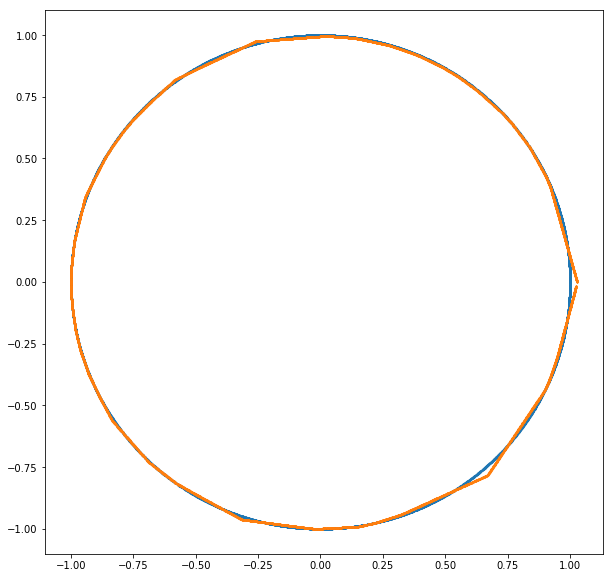

In [6]:
y_pred = fitter.predict(samples.u.values.reshape(-1,1))
fig = plt.figure(figsize = (10,10))
plt.scatter(samples.x,samples.y, s = 0.5)
plt.scatter(y_pred[:,0], y_pred[:,1], s = 0.5)
plt.savefig('../pictures/circle_generator_2d.png')

### Results: x, y vs. u

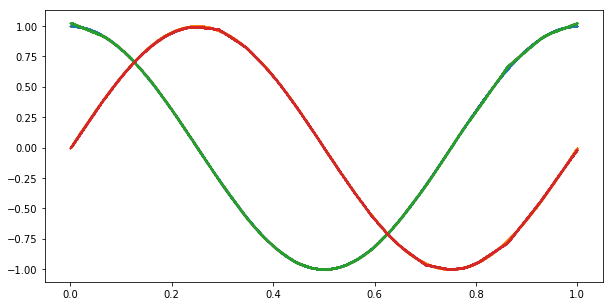

In [7]:
fig = plt.figure(figsize = (10,5))
plt.scatter(samples.u, samples.x, s = 0.2)
plt.scatter(samples.u, samples.y, s = 0.2)
plt.scatter(samples.u, y_pred[:,0], s = 0.2)
plt.scatter(samples.u, y_pred[:,1], s = 0.2)
plt.savefig('../pictures/circle_generator_1d.png')


In [9]:
grid_results = pd.DataFrame(fitter.cv_results_)

/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/zuza/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/zuza/anaconda3/lib/python3.7/si

In [8]:
grid_results

NameError: name 'grid_results' is not defined

In [ ]:
plt.scatter(grid_results.rank_test_score, grid_results.mean_test_score)